In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Expoloratory Data Analysis

In [2]:
data = pd.read_csv('abalone.data', header=None, sep=',')
data = np.array(data)
data[data=='I'] = 0.0
data[data=='M'] = 2.0
data[data=='F'] = 1.0
data = data.astype(np.float32) 

X = np.copy(data[:, :-1])
Y = np.copy(data[:, -1])

Y[Y<10] = 0.0
Y[Y>=10] = 1.0
np.random.seed(2022)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2022)
X_train, Y_train, X_val, Y_val = X_train[X_train.shape[0]//9:], Y_train[X_train.shape[0]//9:], X_train[:X_train.shape[0]//9], Y_train[:X_train.shape[0]//9]

In [3]:
print('Number of samples: {}'.format(X.shape[0]))
print('Number of samples in the training set: {}'.format(X_train.shape[0]))
print('Number of samples in the validation set: {}'.format(X_val.shape[0]))
print('Number of samples in the testing set: {}'.format(X_test.shape[0]))
print('Number of positive samples and negative samples: {}, {}'.format(np.sum(Y), np.sum(1-Y)))

Number of samples: 4177
Number of samples in the training set: 3342
Number of samples in the validation set: 417
Number of samples in the testing set: 418
Number of positive samples and negative samples: 2081.0, 2096.0


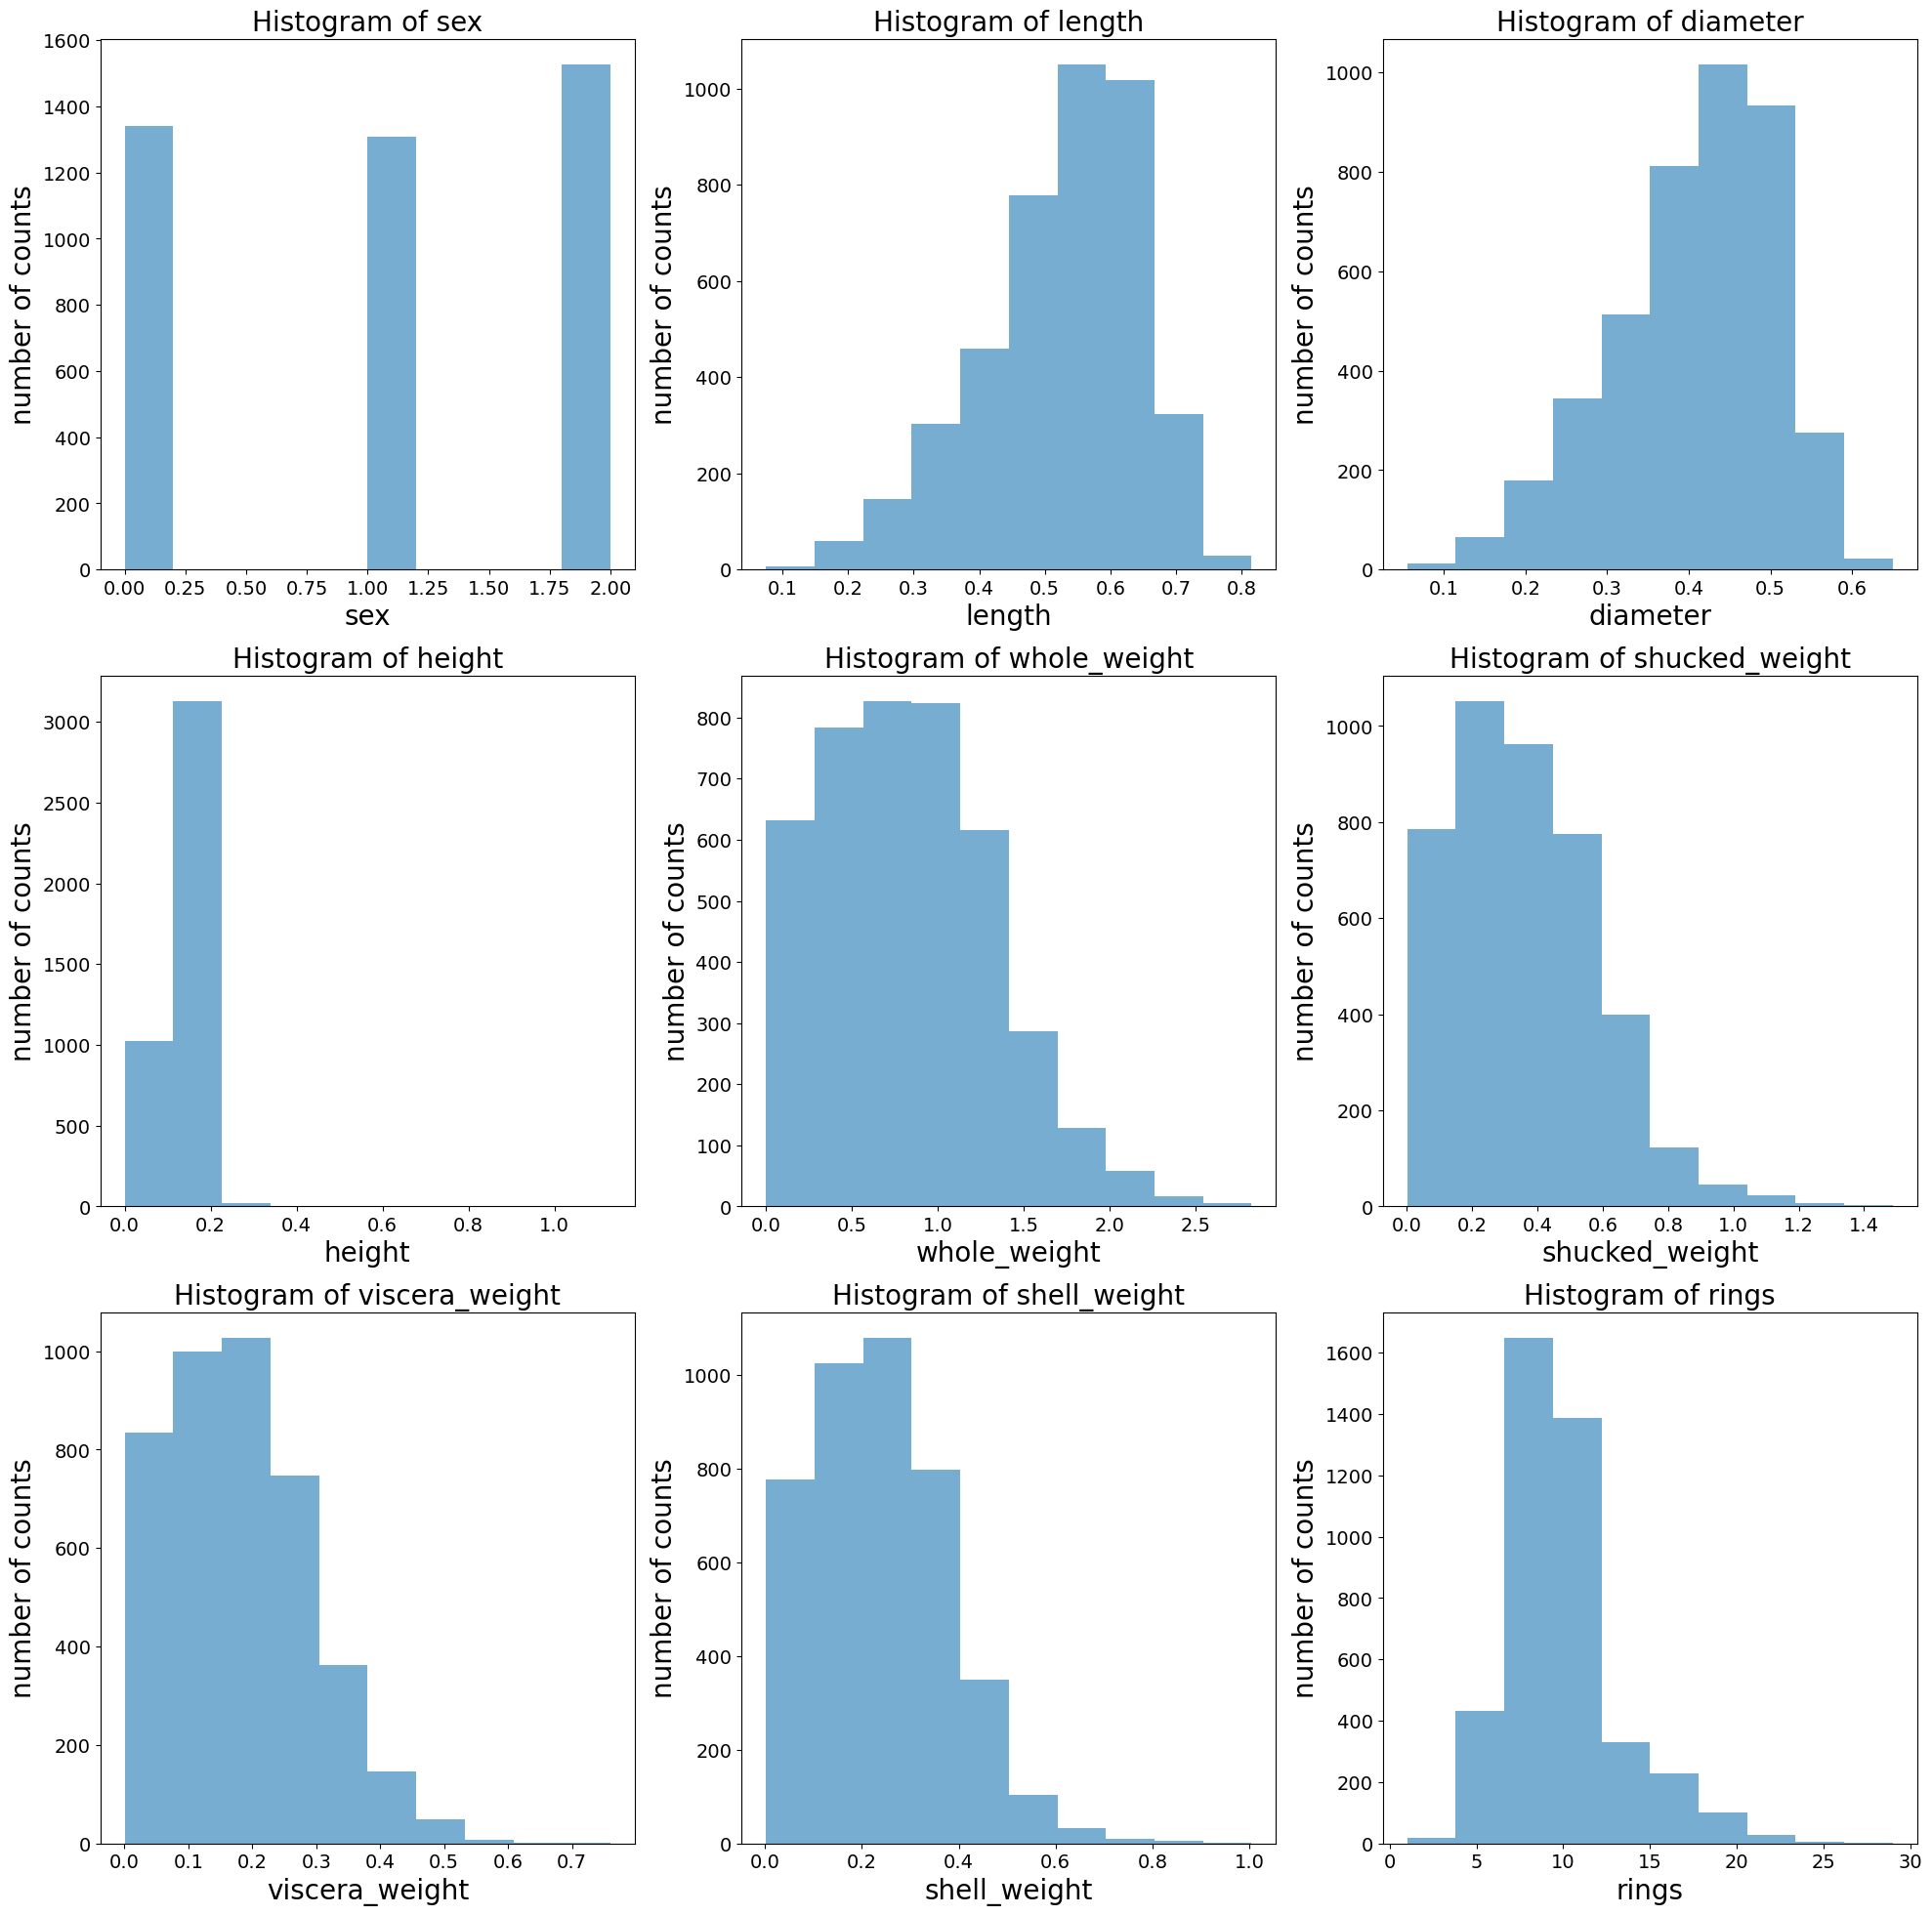

In [4]:
names = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
plt.figure(figsize=(24,24))
for i in range(len(names)):
    plt.subplot(3,3,i+1)
    plt.xlabel(names[i], fontsize=20)
    plt.ylabel('number of counts', fontsize=20)
    plt.title('Histogram of {}'.format(names[i]), fontsize=20)
    plt.tick_params(axis='both',  labelsize=14)
    plt.hist(data[:,i], alpha=0.6)
plt.savefig('article/figures/hist.png'.format(names[i]),bbox_inches='tight', pad_inches=0.0)

# Gaussian naive Bayesian classifier

In [19]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
print('The training accuracy of Gaussian naive Bayesian classifier is {:.2f}%'.format(gnb.score(X_train, Y_train) * 100))
print('The validation accuracy of Gaussian naive Bayesian classifier is {:.2f}%'.format(gnb.score(X_val, Y_val) * 100))
print('The testing accuracy of Gaussian naive Bayesian classifier is {:.2f}%'.format(gnb.score(X_test, Y_test) * 100))

The training accuracy of Gaussian naive Bayesian classifier is 73.73%
The validation accuracy of Gaussian naive Bayesian classifier is 71.46%
The testing accuracy of Gaussian naive Bayesian classifier is 73.21%


# Logistic Regression

In [9]:
Cs = np.arange(0.1, 50, 0.1)
accs = []
for C in Cs:
    lr = LogisticRegression(C=C)
    lr.fit(X_train, Y_train)
    accs.append(lr.score(X_val, Y_val))
print('The max validation accuracy of Logistic regression classifier is {:.2f}% when C = {}'.format(np.max(accs) * 100, Cs[np.argmax(accs)]))
C = Cs[np.argmax(accs)]
lr = LogisticRegression(C=C)
lr.fit(X_train, Y_train)
print('The training accuracy of Logistic regression classifier is {:.2f}%'.format(lr.score(X_train, Y_train) * 100))
print('The validation accuracy of Logistic regression classifier is {:.2f}%'.format(lr.score(X_val, Y_val) * 100))
print('The testing accuracy of Logistic regression classifier is {:.2f}%'.format(lr.score(X_test, Y_test) * 100))
np.save('results/logistic/Cs.npy', Cs)
np.save('results/logistic/accs.npy', accs)

/opt/anaconda3/envs/stat/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/stat/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

The max validation accuracy of Logistic regression classifier is 80.58% when C = 40.400000000000006
The training accuracy of Logistic regression classifier is 78.40%
The validation accuracy of Logistic regression classifier is 80.58%
The testing accuracy of Logistic regression classifier is 78.47%


/opt/anaconda3/envs/stat/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


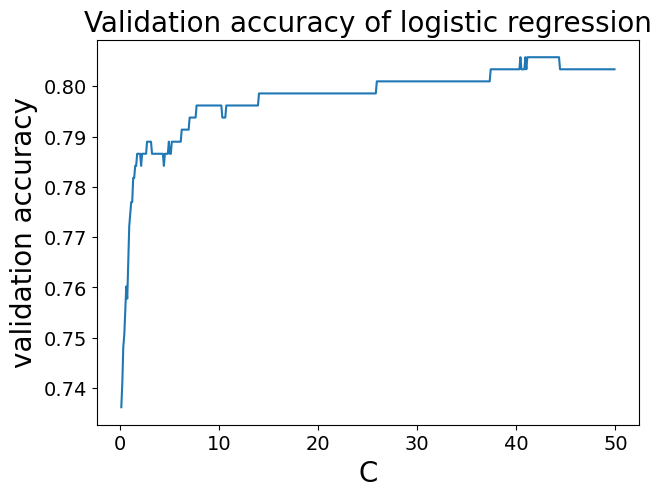

In [12]:
plt.figure(figsize=(7,5))
plt.plot(Cs, accs)
plt.xlabel('C', fontsize=20)
plt.ylabel('validation accuracy', fontsize=20)
plt.title('Validation accuracy of logistic regression', fontsize=20)
plt.tick_params(axis='both',  labelsize=14)
plt.savefig('article/figures/lr.png')

In [16]:
params = [(depth, num_trees) for depth in range(2,7) for num_trees in range(10, 100, 10)]
accs = []
for i in range(len(params)):
    depth, num_trees = params[i]
    rf = RandomForestClassifier(n_estimators = num_trees, max_depth=depth, random_state=0)
    rf.fit(X_train, Y_train)
    accs.append(rf.score(X_val, Y_val))
print('The max validation accuracy of random forests classifier is {:.2f}% when param = {}'.format(np.max(accs) * 100, params[np.argmax(accs)]))
depth, num_trees = params[np.argmax(accs)]
rf = RandomForestClassifier(n_estimators = num_trees, max_depth=depth, random_state=0)
rf.fit(X_train, Y_train)
print('The training accuracy of random forests classifier is {:.2f}%'.format(rf.score(X_train, Y_train) * 100))
print('The validation accuracy of random forests classifier is {:.2f}%'.format(rf.score(X_val, Y_val) * 100))
print('The testing accuracy of random forests classifier is {:.2f}%'.format(rf.score(X_test, Y_test) * 100))

The max validation accuracy of random forests classifier is 81.53% when param = (5, 20)
The training accuracy of random forests classifier is 81.12%
The validation accuracy of random forests classifier is 81.53%
The testing accuracy of random forests classifier is 78.95%


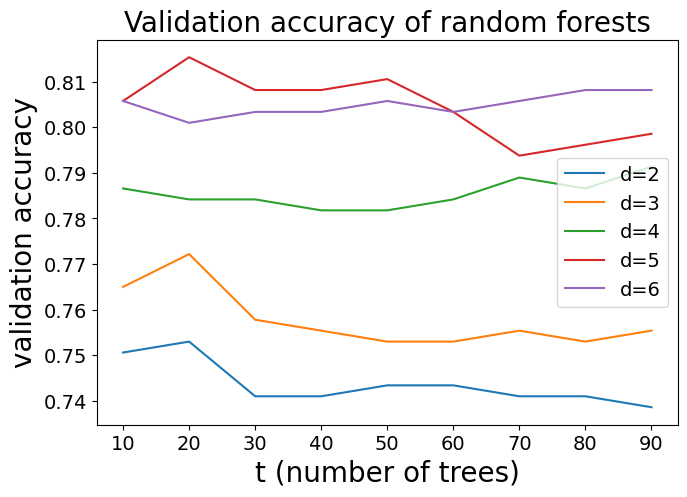

In [36]:
plt.figure(figsize=(7.5,5))
for d in range(2,7):
    plt.plot(range(10, 100, 10), accs[(d-2)*9: (d-1)*9], label='d='+str(d))
plt.legend(fontsize=14, loc='right')
plt.xlabel('t (number of trees)', fontsize=20)
plt.ylabel('validation accuracy', fontsize=20)
plt.title('Validation accuracy of random forests', fontsize=20)
plt.tick_params(axis='both',  labelsize=14)
# plt.savefig('article/figures/rf.png',bbox_inches='tight', pad_inches=0.0)

In [45]:
class MLP(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels=1) -> None:
        super().__init__()
        self.net = nn.Sequential(nn.Linear(in_channels, hidden_channels), 
                        nn.ReLU(),
                        nn.Linear(hidden_channels, out_channels))
        self.in_channels = in_channels
        self.hidden_channels = hidden_channels
        self.out_channels = out_channels
    
    def forward(self, X):
        out = self.net(X)
        out = torch.sigmoid(out)
        return out.squeeze()
    
    def train(self, X, Y, maxiter=100000):
        optimizer = torch.optim.Adam(params=self.parameters(), lr=1e-3)
        losses = []
        for i in range(maxiter):
            out = self.forward(X)
            loss = -torch.mean(Y * out + (1-Y)* (1-out))
            losses.append(-loss.item())
            if (i+1) % 2000 == 0:
                print('Iter: {}'.format(i+1), -loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if (i+1) % 10000 == 0:
                for g in optimizer.param_groups:
                    g['lr'] *= 0.75
        return losses
torch.manual_seed(2022)
model = MLP(in_channels=X_train.shape[1], hidden_channels=X_train.shape[1]*2)
losses = model.train(torch.from_numpy(X_train), torch.from_numpy(Y_train))

accuracy = np.mean(np.equal(Y_val, np.array(model(torch.from_numpy(X_val)) > 0.5)))
accs.append(accuracy)
print('The validation accuracy of neural network classifier is {:.2f}%'.format(accuracy * 100))

Iter: 2000 0.7503995299339294
Iter: 4000 0.7816473841667175
Iter: 6000 0.7908931970596313
Iter: 8000 0.7946616411209106
Iter: 10000 0.7978257536888123
Iter: 12000 0.7993545532226562
Iter: 14000 0.8006389737129211
Iter: 16000 0.8015923500061035
Iter: 18000 0.8022499680519104
Iter: 20000 0.8032035827636719
Iter: 22000 0.8036296963691711
Iter: 24000 0.8039728999137878
Iter: 26000 0.8042927384376526
Iter: 28000 0.8045832514762878
Iter: 30000 0.8048001527786255
Iter: 32000 0.8049493432044983
Iter: 34000 0.8050876259803772
Iter: 36000 0.8052147626876831
Iter: 38000 0.8053300380706787
Iter: 40000 0.8054364919662476
Iter: 42000 0.8055176138877869
Iter: 44000 0.8055965900421143
Iter: 46000 0.8056708574295044
Iter: 48000 0.8057410717010498
Iter: 50000 0.8058072328567505
Iter: 52000 0.8058574199676514
Iter: 54000 0.8059061765670776
Iter: 56000 0.805953323841095
Iter: 58000 0.8059981465339661
Iter: 60000 0.8060410022735596
Iter: 62000 0.8060742020606995
Iter: 64000 0.8061068058013916
Iter: 66000 0

In [51]:
torch.save(model.state_dict(), 'results/nn/model.pt')
np.save('results/nn/losses.npy', losses)

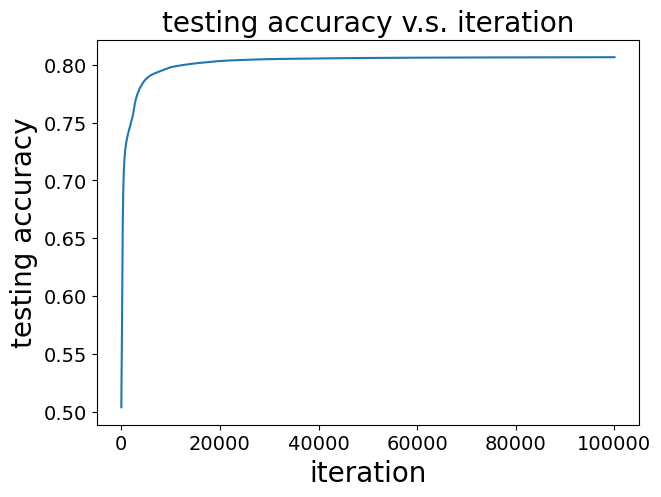

In [50]:
plt.figure(figsize=(7,5))
plt.plot(losses)
plt.xlabel('iteration', fontsize=20)
plt.ylabel('testing accuracy', fontsize=20)
plt.title('testing accuracy v.s. iteration', fontsize=20)
plt.tick_params(axis='both',  labelsize=14)
plt.savefig('article/figures/nn.png')

In [52]:
print('The training accuracy of neural network classifier is {:.2f}%'.format(np.mean(np.equal(Y_train, np.array(model(torch.from_numpy(X_train)) > 0.5))) * 100))
print('The validation accuracy of neural network classifier is {:.2f}%'.format(np.mean(np.equal(Y_val, np.array(model(torch.from_numpy(X_val)) > 0.5))) * 100))
print('The testing accuracy of neural network classifier is {:.2f}%'.format(np.mean(np.equal(Y_test, np.array(model(torch.from_numpy(X_test)) > 0.5))) * 100))

The training accuracy of neural network classifier is 80.76%
The validation accuracy of neural network classifier is 81.06%
The testing accuracy of neural network classifier is 80.38%
